# 1. Introduction

This project investigates the titanic dataset. The titanic dataset consists of information on the passengers that were onboard Titanic. The dataset provides information such as age, sex, name, ticket no., cabin, whether the passenger survived or not, the cost of ticket etc.


## Questions

After a quick glance on the dataset, the following questions can be asked for the data analysis process:
 1. How did age and gender affect the chances of survival?
 2. Is there any relation between class and survival?
 3. Passengers boarding from which location returned home? (assuming their embarked location is their home town)

# 2. Package Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# style for graphs
sns.set_style("dark")


# 3. Read csv to Dataframe

In [2]:
titanic_df = pd.read_csv('titanic-data.csv')

In [3]:
# Let's print the first few records to see if the file loaded properly
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean Up

Now that we know that our file has loaded properly, we can proceed to investigate the dataset. First lets drop the columns that won't be needed for our analysis and to answer our questions. Since, we won't be needing Ticket and Cabin data let's drop those two columns.

In [4]:
titanic_df = titanic_df.drop(["Ticket", "Cabin"], axis =1)

In [5]:
#Lets look at our first few records again to ensure the columns were dropped
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Since, we won't need Name and Fare information either let's drop those columns as well

In [6]:
titanic_df = titanic_df.drop(["Name", "Fare"], axis = 1)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [7]:
#Lets look at the last few records
titanic_df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,NaN,1,2,S
889,890,1,1,male,26.0,0,0,C
890,891,0,3,male,32.0,0,0,Q


In [8]:
# lets look for missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

We can see that there are 177 missing age values, this will impact our results while we are trying to answer how age and gender played a role in survivability. Let's find out which gender corresponded to the missing values

In [9]:
missing_values = pd.isnull(titanic_df['Age'])
missing_values_male = titanic_df[missing_values]['Sex'] == 'male'
missing_values_female = titanic_df[missing_values]['Sex'] == 'female'
print ('Number of male datapoints with missing age = {}'.format(missing_values_male.sum()))
print ('Number of female datapoints with missing age = {}'.format(missing_values_female.sum()))

Number of male datapoints with missing age = 124
Number of female datapoints with missing age = 53


As we can see 124 age data values corresponding to gender male are missing, and 53 age data values  correponding to gender female are missing

# 4. Exploratory Analysis

### Descriptive Statistics
Let's look at the general descriptive statistics of our dataframe. 

In [10]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


### Total Survivors
Before we get into answering our questions, let's find out the total number of survivors:

In [11]:
total_survivors = titanic_df[titanic_df.Survived == 1] # Survived = 1 (The passenger survived ), Survived = 0 (The passenger died)
print('Total number of survivors were {}'.format(total_survivors.count()[1]))


Total number of survivors were 342


## Gender Distribution
Let's find out the gender distribution from this dataset, i.e. the number of males and females

In [12]:
number_of_males = titanic_df[titanic_df.Sex == 'male']
number_of_females = titanic_df[titanic_df.Sex == 'female']
print ('Number of males: {}'.format(number_of_males.count()['Sex']))
print ('Number of females: {}'.format(number_of_females.count()['Sex']))

Number of males: 577
Number of females: 314


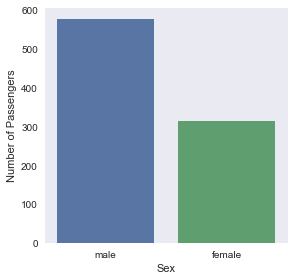

In [13]:
# Plotting number of males and females
plt_mf = sns.factorplot('Sex', data= titanic_df, kind='count')
plt_mf.despine(left=True)
plt_mf.set_ylabels("Number of Passengers")
sns.plt.show()

### Survivors by Gender
Now that we know the total number of survivors and the gender distribution let's find out the number of survivors by gender

In [14]:
survivors_by_gender = pd.crosstab(titanic_df['Survived'],titanic_df['Sex'])
print (survivors_by_gender)

Sex       female  male
Survived              
0             81   468
1            233   109


From the table above we find that 233 females survived whereas only 109 males survived from the titanic

In [15]:
# The percent survivors of male and female passengers from the total passengers
def survival_rate(sex):
    total = titanic_df.groupby(['Sex']).size()[sex].astype('float')
    male_survived = titanic_df.groupby(['Survived','Sex']).size()[1,'male'].astype('float')
    female_survived = titanic_df.groupby(['Survived','Sex']).size()[1,'female'].astype('float')

    percent_male_survived = (male_survived/total*100).round(1)
    percent_female_survived = (female_survived/total*100).round(1)

    return percent_male_survived
    return percent_female_survived

In [16]:
print('% of male that survived = {}%'.format(survival_rate('male')))
print('% of female that survived = {}%'.format(survival_rate('female')))

% of male that survived = 18.9%
% of female that survived = 34.7%


## Age Distribution


In [17]:
# Let's find out the youngest and oldest passenger

yng_passenger = titanic_df['Age'].min()
print('The youngest passenger was {} years old'.format(yng_passenger))

old_passenger = titanic_df['Age'].max()
print('The oldest passenger was {} years old'.format(old_passenger))



The youngest passenger was 0.42 years old
The oldest passenger was 80.0 years old


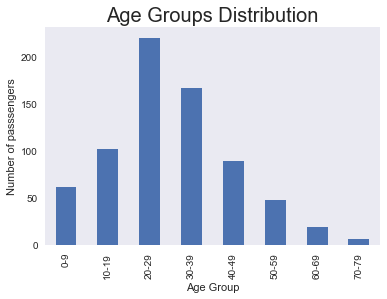

In [18]:
# age group distribution
# here to make things uncluttered we will group our age labels instead of plotting each age individually

age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic_df['age_group'] = pd.cut(titanic_df.Age, range(0, 81, 10), right=False, labels=age_labels)
titanic_df.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Age Groups Distribution",fontsize=20)
plt.ylabel('Number of passsengers')
plt.xlabel('Age Group');
plt.show()

In [19]:
# Average age of passengers
avg_age = titanic_df['Age'].mean()
print('The average age of passengers onboard were {} years old'.format(avg_age))

The average age of passengers onboard were 29.6991176471 years old


Now, let's look at the surviors by gender and age group

In [20]:
print(titanic_df.groupby(['Sex','age_group']).Survived.count())

Sex     age_group
female  0-9           30
        10-19         45
        20-29         72
        30-39         60
        40-49         32
        50-59         18
        60-69          4
male    0-9           32
        10-19         57
        20-29        148
        30-39        107
        40-49         57
        50-59         30
        60-69         15
        70-79          6
Name: Survived, dtype: int64


So now that we have done enough investigation on the survivors by gender and age group, we can start to answer our first question:
#### Q1. How did age and gender affect the chances of survival? 

### Gender:
From our exploratory analysis of this data set we found that out of the 891 passengers listed, 233 females (34.7%) and 109 males survived (18.9 %). 

In [21]:
# Average survival by gender
titanic_df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

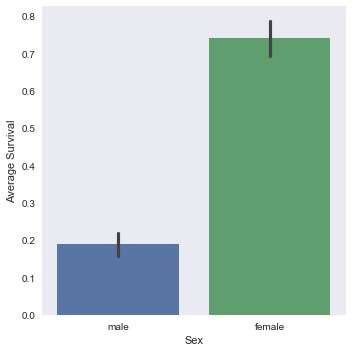

In [22]:
prob_plot = sns.factorplot("Sex","Survived", data=titanic_df,kind="bar",size=5)
prob_plot.despine(left=True)
prob_plot.set_ylabels("Average Survival")
sns.plt.show()

On average, females survived more than males

### Age:
Instead of looking at each Individual age, we will look at age groups that had most survials

In [23]:
titanic_df.groupby(['age_group']).Survived.mean()

age_group
0-9      0.612903
10-19    0.401961
20-29    0.350000
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64

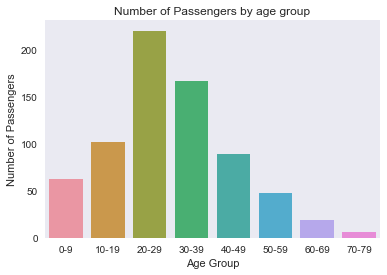

In [24]:
# We plot the number of people in each age group
plt= sns.countplot(x="age_group", data=titanic_df);
plt.set(title='Number of Passengers by age group');
plt.set(xlabel='Age Group', ylabel='Number of Passengers');

The age group distribution is normal

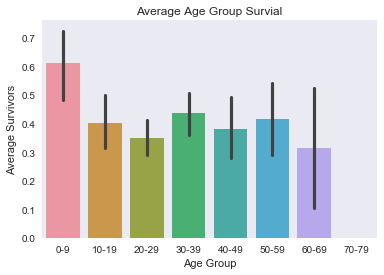

In [25]:
plt2 =sns.barplot(x="age_group", y="Survived", data=titanic_df);
plt2.set(title='Average Age Group Survial')
plt2.set(xlabel='Age Group', ylabel='Average Survivors');

We find that the most number of passengers were from the age group 20-29 followed by the age group 30-39. However, on average the highest survivors were from the age group 0-9 (i.e. children). The other age groups mean survival distribution was uniform. But since we know that females survived more than men, does this mean most of the survivors from each age group were women?

[<matplotlib.text.Text at 0x118a63190>, <matplotlib.text.Text at 0x118d0f5d0>]

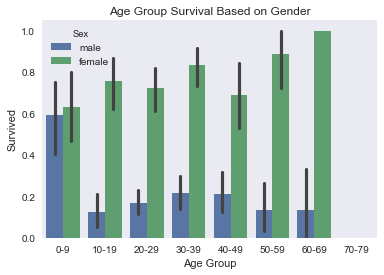

In [26]:
# Age group combine with gender survival rate
gender_age_plt = sns.barplot(x="age_group", y="Survived", hue="Sex", data=titanic_df);
gender_age_plt.set(title='Age Group Survival Based on Gender')
gender_age_plt.set(xlabel='Age Group', ylabel='Survived')

From the above plot we can see that most surviors from age 10-69 were mostly female. The only age group where the male and female surviors were almost similar is the age group 0-9 i.e. children. Hence, we can safely say that unless the passengers were young children aged between 0-9 the survival chances heavily depended on gender. In this case if the passengers were female, they had a better chance of survival regardless of age.

## Class Distribution

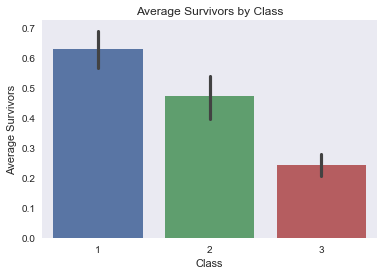

In [27]:
plt3 =sns.barplot(x="Pclass", y="Survived", data=titanic_df);
plt3.set(title='Average Survivors by Class')
plt3.set(xlabel='Class', ylabel='Average Survivors');

From the visualization we can clearly see that Class 1 had the most survivors on avg, followed by Class 2, and Class 3

In [28]:
print(titanic_df.groupby(['Pclass']).Survived.mean())*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


#### Q2. Is there any relation between class and survival?

From the bar plot above we found that passengers in class 1 had more chances of survial and class 3 passengers had the least chance of survial. More specifically:

Class 1 passengers had a survival chance of 62.96%
Class 2 passengers had a survival chance of 47.28%
Class 3 passengers had a survival chance of 24.23%

[<matplotlib.text.Text at 0x11915c190>, <matplotlib.text.Text at 0x118ffadd0>]

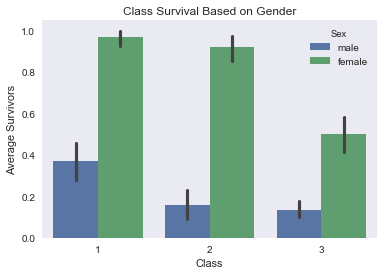

In [29]:
plt4 = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df);
plt4.set(title = 'Class Survival Based on Gender')
plt4.set(xlabel='Class', ylabel = 'Average Survivors')

In [30]:
print(titanic_df.groupby(['Sex','Pclass']).Survived.mean())*100

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64


As we know that female passengers had a higher chance of survial than male passengers, we should expect that female passengers should have a higher survival chance in each class too. The plot above confirms, that indeed female passengers had higher chances of survival than male passengers in each class.

Now, let's factor in the information that we found earlier about class survial i.e. class 1 had the highest survial chances followed by class 2, and class 3 had the lowest survival chance. Again, our plot above confirms this for both male and female sexes. Infact, female passengers had an astonishing 96.8% chance of survial in class 1 and 92.10% chance of survival in class 2. However, when we look at class 3 the chance of survival for female passenger falls to 50% (that's more than 40% drop in survival chance! )

We see same trend for male passengers as well -- class 1 males passengers had 36.8% chance, class 2 male passengers had 15.7% chance, and class 3 had 13.5% chance of survival

## Embarked Location Survivors

In [31]:
survivors_by_location = pd.crosstab(titanic_df['Survived'],titanic_df['Embarked'])
print (survivors_by_location)

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [32]:
gender_by_location = pd.crosstab(titanic_df['Sex'],titanic_df['Embarked'])
print (gender_by_location)

Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441


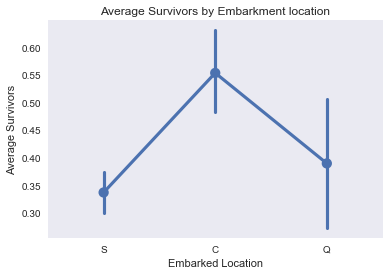

In [33]:
plt3 =sns.pointplot(x="Embarked", y="Survived", data=titanic_df);
plt3.set(title='Average Survivors by Embarkment location')
plt3.set(xlabel='Embarked Location', ylabel='Average Survivors');


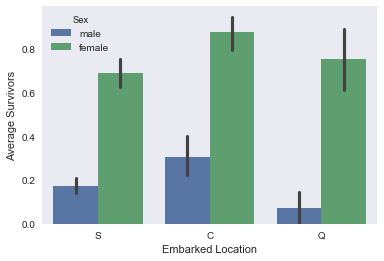

In [34]:
plt4=sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic_df);
plt4.set(xlabel='Embarked Location', ylabel='Average Survivors');

In [35]:
titanic_df.groupby(['Embarked']).Survived.mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [36]:
titanic_df.groupby(['Sex','Embarked']).Survived.mean()*100

Sex     Embarked
female  C           87.671233
        Q           75.000000
        S           68.965517
male    C           30.526316
        Q            7.317073
        S           17.460317
Name: Survived, dtype: float64

#### Q3. Passengers boarding from which location returned home? (assuming their embarked location is their home town)

**1.** We see that embarked location **S** had the most number of survivors **(217)**, followed by location **C** **(93)**, and finally location **Q** had the least number of survivors **(30)**

**2. **Also, we see that the survival chances of females are higher than males in this case too (for all locations). Another interesting result is that even though location **C** had fewer survivors than location **S**, the survival chance of passengers from location **C** was much higher than location **S**. 

Infact, female passengers from both location **C** and location **Q** had higher chances of survival than female passengers from location **S**

**3.** Overall passengers that embarked from location **C** had **55%** chance of survival, passengers from location **Q** had approx. **39%** chance, and passengers from location **S** approx. **34%** chance of survival




# 5. Conclusion

#### We can list three major takeaways from our analysis:
**1.** Female passengers had a better chance of survival regardless of age and age group 0-9 had much better chance of survival than the other age groups

**2.** Class 1 had the best survival chance followed by Class 2, and Class 3 had the least survival chance (for both genders)

**3.** Most of the survivors that returned home embarked from location **S** followed by location **C**, and location **Q** had the least amount of survivors returning. However, location **C and Q** had higher chances of survival than location **S**

# 6. Limitations

### **1.** Missing Data:
Many data values were missing from the table and also we were limited to a sample of the entire population


### **2.** Other variables that were not provided in the dataset:
(Eg: temperature) -- when the titanic sank almost all passengers that were able to leave the ship hand to land in water. Many deaths must have occurred due to hypothermia. If we had temperature data we could have explored the cause of death. 

Moreover, we could have explored the tolerance of vairous age group to low temperature conditions. For instance, we could theorize older people to have lower tolerance to extreme cold temperatures and that might have lead to the death of those passengers.

# 7. References

http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/
http://nestacms.com/docs/creating-content/markdown-cheat-sheet
http://seaborn.pydata.org/tutorial/categorical.html

